# Complete Analysis Organized According to the Workflow of a Data Scientist
Below is a complete analysis structured as per the workflow provided. The steps include importing, tidying, transforming, visualizing, modeling, and communication.

In [1]:
# Load necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

## Step 1. Importing Data
- Import the dataset into Python as `car`
- Explore the dataset information and types

In [2]:

url = 'https://raw.githubusercontent.com/sijiao-liu/customer-car-prediction/main/data/car_sales.csv'

car = pd.read_csv(url)

car.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [3]:
# Get the data information
print("Dataset Info.:")
car.info()

Dataset Info.:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


## Step 2. Tidying Data
1. Check for `missing values` and `duplicate rows`
2. Convert `Date` column to datetime format
3. Standardize relevant and necessary categorical variables' formatting
4. Drop irrelevant and unnecessary columns (`Car_id`, `Customer Name`, `Dealer_Name`, `Engine`, `Dealer_No`, `Phone`). Notice that dropping `Engine` because it has an one-to-one relationship with `Transmission`
5. Extract `Year` and `Month` from the `Date` column.


In [4]:
# 2.1.1 Check for missing values
missing_values = car.isnull().sum()

# 2.1.2 Check for duplicate rows
duplicates_count = car.duplicated().sum()

# 2.2 Convert Date column to datetime format
car['Date'] = pd.to_datetime(car['Date'], errors='coerce')

# Summary of cleaned data
cleaning_summary = {
    "Missing Values": missing_values.sum(),
    "Duplicate Rows": duplicates_count,
    "Date Conversion Issues": car['Date'].isnull().sum()
}

cleaning_summary

{'Missing Values': 1, 'Duplicate Rows': 0, 'Date Conversion Issues': 0}

In [5]:
# Filter columns with missing values
columns_with_missing = missing_values[missing_values > 0]

# Print the result
print("Columns with missing values and their counts:")
print(columns_with_missing)

Columns with missing values and their counts:
Customer Name    1
dtype: int64


<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">

The dataset contains only one missing values under Customer Name, which won't affect our analysis as Customer Name isn't necessary for us.

</div>


In [6]:
# List of relevant and necessary categorical variables to standardize
categorical_variables = ['Gender', 'Company', 'Model', 'Transmission', 'Color', 'Body Style', 'Dealer_Region']

# 2.3 Standardizing formatting
for column in categorical_variables:
    car[column] = car[column].str.capitalize()

In [7]:
# 2.4 Drop irrelevant and unnecessary columns
columns_to_drop = ['Car_id', 'Customer Name', 'Dealer_Name', 'Engine', 'Dealer_No ', 'Phone']
car_cleaned = car.drop(columns=columns_to_drop, errors='ignore')  # `errors='ignore'` skips columns that don't exist

# 2.5 Extract 'Year' and 'Month' from `Date` column
car_cleaned['Year'] = car_cleaned['Date'].dt.year
car_cleaned['Month'] = car_cleaned['Date'].dt.month

## Change 'Year' and 'Month' to category datatype
car_cleaned['Year'] = car_cleaned['Year'].astype('object')
car_cleaned['Month'] = car_cleaned['Month'].astype('object')

car_cleaned.head()

,Date,Gender,Annual Income,Company,Model,Transmission,Color,Price ($),Body Style,Dealer_Region,Year,Month
0,2022-01-02,Male,13500,Ford,Expedition,Auto,Black,26000,Suv,Middletown,2022,1
1,2022-01-02,Male,1480000,Dodge,Durango,Auto,Black,19000,Suv,Aurora,2022,1
2,2022-01-02,Male,1035000,Cadillac,Eldorado,Manual,Red,31500,Passenger,Greenville,2022,1
3,2022-01-02,Male,13500,Toyota,Celica,Manual,Pale white,14000,Suv,Pasco,2022,1
4,2022-01-02,Male,1465000,Acura,Tl,Auto,Red,24500,Hatchback,Janesville,2022,1


In [8]:
# Define the file path
clean_data_path = "../data/clean_car_sales.csv"

# Ensure the directory exists
os.makedirs(os.path.dirname(clean_data_path), exist_ok=True)

# Check if car_cleaned is a Pandas DataFrame
if isinstance(car_cleaned, pd.DataFrame):
    print("car_cleaned is already a Pandas DataFrame.")
else:
    print("car_cleaned is not a Pandas DataFrame. Converting it to one...")
    car_cleaned = pd.DataFrame(car_cleaned)

# Save to CSV
car_cleaned.to_csv(clean_data_path, index=False, encoding='utf-8')

car_cleaned is already a Pandas DataFrame.


## Step 3. Transforming Data
Focus on relevant variables and calculate summary statistics:
1. Apply initial data exploration
    - Data information
    - Basic statistics and distribution of numberica variables
    - Distribution of the categorical variables: counts of unique values
2. Correlation Matrix
    - Understand relationships between variables, and decided on which variables needed to be dropped further before Step 5. Data Modeling.

In [9]:
# 3.1.1 Get the data information
print("Dataset Info.:")
car_cleaned.info()

Dataset Info.:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           23906 non-null  datetime64[ns]
 1   Gender         23906 non-null  object        
 2   Annual Income  23906 non-null  int64         
 3   Company        23906 non-null  object        
 4   Model          23906 non-null  object        
 5   Transmission   23906 non-null  object        
 6   Color          23906 non-null  object        
 7   Price ($)      23906 non-null  int64         
 8   Body Style     23906 non-null  object        
 9   Dealer_Region  23906 non-null  object        
 10  Year           23906 non-null  object        
 11  Month          23906 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 2.2+ MB


In [10]:
# 3.1.2 Get the basic statistics and distribution of numerical variables
print("Numerical Features Statistics:")
car_cleaned.describe()

Numerical Features Statistics:


,Date,Annual Income,Price ($)
count,23906,2.390600e+04,23906.000000
mean,2023-03-01 14:28:10.822387456,8.308403e+05,28090.247846
min,2022-01-02 00:00:00,1.008000e+04,1200.000000
25%,2022-09-20 00:00:00,3.860000e+05,18001.000000
50%,2023-03-13 00:00:00,7.350000e+05,23000.000000
75%,2023-09-08 00:00:00,1.175750e+06,34000.000000
max,2023-12-31 00:00:00,1.120000e+07,85800.000000
std,NaN,7.200064e+05,14788.687608


In [56]:
# List of relevant and necessary categorical variables to standardize
categorical_variables_cleaned = ['Gender', 'Company', 'Model', 'Transmission', 'Color', 'Body Style', 'Dealer_Region', 'Year', 'Month']

# 3.1.3 Iterate through the categorical variables and display value counts (distribution)
print("Categorical Variables Unique Values:")
print("=" * 50)  # Separator for clarity
for variable in categorical_variables_cleaned:
    #print(f"\n{variable}")
    print(car_cleaned[variable].value_counts())
    print("-" * 50)  # Separator for clarity

Categorical Variables Unique Values:
Gender
Male      18798
Female     5108
Name: count, dtype: int64
--------------------------------------------------
Company
Chevrolet     1819
Dodge         1671
Ford          1614
Volkswagen    1333
Mercedes-b    1285
Mitsubishi    1277
Chrysler      1120
Oldsmobile    1111
Toyota        1110
Nissan         886
Mercury        874
Lexus          802
Pontiac        796
Bmw            790
Volvo          789
Honda          708
Acura          689
Cadillac       652
Plymouth       617
Saturn         586
Lincoln        492
Audi           468
Buick          439
Subaru         405
Jeep           363
Porsche        361
Hyundai        264
Saab           210
Infiniti       195
Jaguar         180
Name: count, dtype: int64
--------------------------------------------------
Model
Diamante         418
Silhouette       411
Prizm            411
Passat           391
Ram pickup       383
                ... 
Mirage            19
Alero             18
Rx300             

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">

### Key Observations from Initial Statistics:

1. Demographic Insights:
    - Gender: Majority of buyers are male (18,798 out of 23,906).
    - Annual Income: Wide range, from $10,080 to $11,200,000, with a median around $735,000.

2. Sales Performance:
    - The most frequent dealer region is "Austin."
    - SUVs dominate sales, followed by other body styles.

3. Pricing Analysis:
    - Price range: $1,200 to $85,800, with an average price of ~$28,090.
    - The most frequently occurring price is around $23,000.

4. Temporal Insights:
    - Data spans from January 2022 to December 2023.
    - There is likely seasonality in sales, with the second half of the year possibly seeing higher activity.

</div>

In [25]:
# 3.2 list the pairwise high correlations

# Encode categorical variables using one-hot encoding
encoded_data = pd.get_dummies(car_cleaned, drop_first=True)

# Compute the correlation matrix for the encoded dataset
correlation_matrix_full = encoded_data.corr()

# Flatten the correlation matrix and extract strong correlations in the specified ranges
correlation_flat = correlation_matrix_full.unstack().reset_index()
correlation_flat.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Remove duplicate pairs and self-correlations
correlation_flat = correlation_flat[correlation_flat['Variable 1'] != correlation_flat['Variable 2']]

# Filter for correlations in the specified ranges
strong_positive = correlation_flat[(correlation_flat['Correlation'] >= 0.5) & (correlation_flat['Correlation'] < 1)]
strong_negative = correlation_flat[(correlation_flat['Correlation'] <= -0.5) & (correlation_flat['Correlation'] > -1)]

# Combine results for easier viewing
strong_correlations = pd.concat([strong_positive, strong_negative]).sort_values(by='Correlation', ascending=False)

# Reset the index to remove the first column
strong_correlations.reset_index(drop=True, inplace=True)
#strong_correlations  # Display the DataFrame directly

# Highlight strong correlations directly in a displayed DataFrame for easy identification.
def highlight(val):
    if val >= 0.5 and val < 1:
        return 'background-color: lightgreen'
    elif val <= -0.5 and val > -1:
        return 'background-color: lightcoral'
    return ''

styled_correlations = strong_correlations.style.applymap(highlight, subset=['Correlation'])
styled_correlations

C:\Users\sijia\AppData\Local\Temp\ipykernel_34804\723828198.py:35: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_correlations = strong_correlations.style.applymap(highlight, subset=['Correlation'])


,Variable 1,Variable 2,Correlation
0,Date,Year_2023,0.873647
1,Year_2023,Date,0.873647
2,Model_A6,Company_Audi,0.835971
3,Company_Audi,Model_A6,0.835971
4,Model_Forester,Company_Subaru,0.790972
5,Company_Subaru,Model_Forester,0.790972
6,Company_Hyundai,Model_Sonata,0.786508
7,Model_Sonata,Company_Hyundai,0.786508
8,Model_Carrera coupe,Company_Porsche,0.695510
9,Company_Porsche,Model_Carrera coupe,0.695510


<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">

The result shows that Company and Model, Date and Year are strong correlated. We will drop Model and Date before training models.

</div>


## Step 4. Data Visualization
To derive meaningful insights from the data, we can conduct an initial exploratory analysis focusing on the following areas with visualization:

#### 4.1 Starting with demographic insights, let's analyze gender distribution and income patterns in relation to purchasing decisions. ​

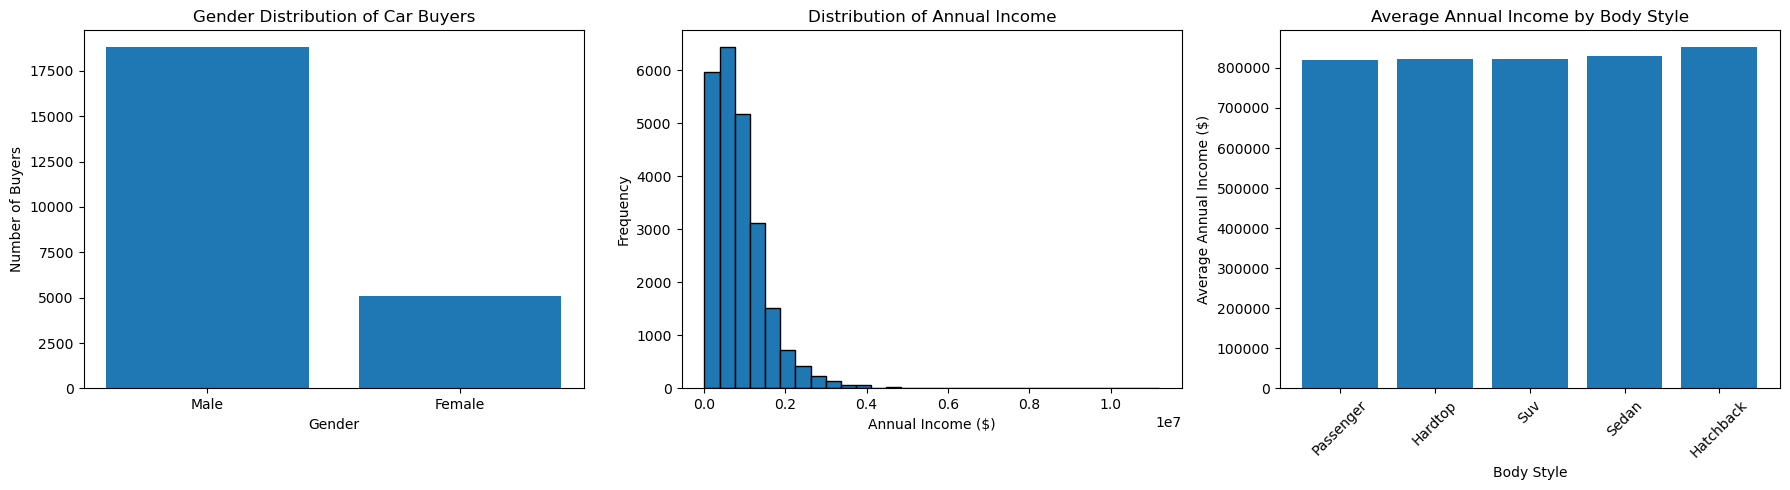

In [12]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 4.1.1 Gender Distribution
gender_counts = car_cleaned['Gender'].value_counts()
axes[0].bar(gender_counts.index, gender_counts.values)
axes[0].set_title("Gender Distribution of Car Buyers")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of Buyers")

# 4.1.2 Income Distribution Analysis
axes[1].hist(car_cleaned['Annual Income'], bins=30, edgecolor='black')
axes[1].set_title("Distribution of Annual Income")
axes[1].set_xlabel("Annual Income ($)")
axes[1].set_ylabel("Frequency")

## Analyzing income vs. preferred body style
income_body_style = car_cleaned.groupby('Body Style')['Annual Income'].mean().sort_values()
axes[2].bar(income_body_style.index, income_body_style.values)
axes[2].set_title("Average Annual Income by Body Style")
axes[2].set_xlabel("Body Style")
axes[2].set_ylabel("Average Annual Income ($)")
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">

##### The Demographic Insights reveals:

1. Gender Distribution:
    - A significantly higher number of male buyers compared to female buyers.

2. Income Patterns:
    - Most buyers have an annual income concentrated in lower to middle ranges, with a few outliers at very high income levels.

3. Income vs. Body Style:
    - Higher-income buyers tend to prefer Hatchbacks, while lower-income buyers are inclined towards Passengers.

</div>

#### 4.2 Exploring sales performance focusing on regional trends, popular manufacturers, and car categories. ​

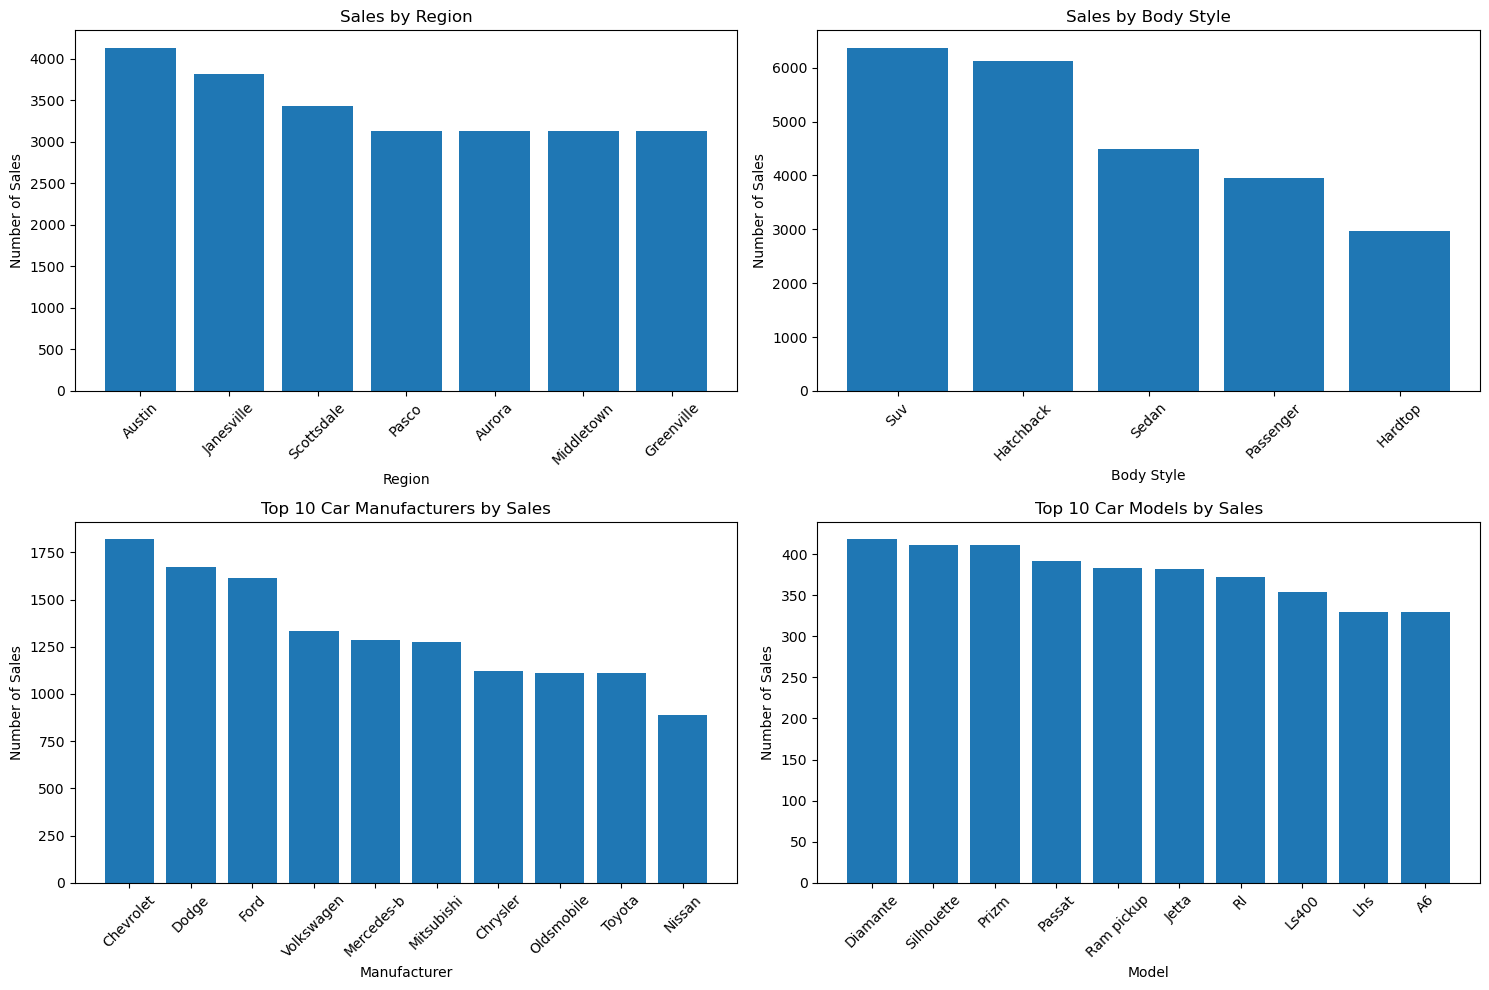

In [13]:
# Create a figure with 2 rows and 2 columns for the updated visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 4.2.1 Regional Sales Trends
region_sales = car_cleaned['Dealer_Region'].value_counts()
axes[0, 0].bar(region_sales.index, region_sales.values)
axes[0, 0].set_title("Sales by Region")
axes[0, 0].set_xlabel("Region")
axes[0, 0].set_ylabel("Number of Sales")
axes[0, 0].tick_params(axis='x', rotation=45)

# 4.2.2 Sales by Body Style
body_style_sales = car_cleaned['Body Style'].value_counts()
axes[0, 1].bar(body_style_sales.index, body_style_sales.values)
axes[0, 1].set_title("Sales by Body Style")
axes[0, 1].set_xlabel("Body Style")
axes[0, 1].set_ylabel("Number of Sales")
axes[0, 1].tick_params(axis='x', rotation=45)

# 4.2.3.1 Top Manufacturers/Companies 
top_manufacturers = car_cleaned['Company'].value_counts().head(10)
axes[1, 0].bar(top_manufacturers.index, top_manufacturers.values)
axes[1, 0].set_title("Top 10 Car Manufacturers by Sales")
axes[1, 0].set_xlabel("Manufacturer")
axes[1, 0].set_ylabel("Number of Sales")
axes[1, 0].tick_params(axis='x', rotation=45)

# 4.2.3.2 Top Models
top_models = car_cleaned['Model'].value_counts().head(10)
axes[1, 1].bar(top_models.index, top_models.values)
axes[1, 1].set_title("Top 10 Car Models by Sales")
axes[1, 1].set_xlabel("Model")
axes[1, 1].set_ylabel("Number of Sales")
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">

##### Sales performance analysis indicates:

1. Regional Trends:
    - "Austin" is the leading region in car sales, followed by a few others, Janesville and Scottsdale, with moderate sales figures.

2. Car Categories:
    - SUVs are the most purchased body style, with Hatchbacks and Sedan cars following behind.

3. Top Manufacturers/Companies:
    - Chevrolet leads in popularity, followed by Dodge and Ford.

4. Top Models:
    - Diamante leads in popularity, followed by others like Silhouette and Prizm.

</div>


#### 4.3 Exploring pricing analysis, including price distributions and the relationship between price and other factors.

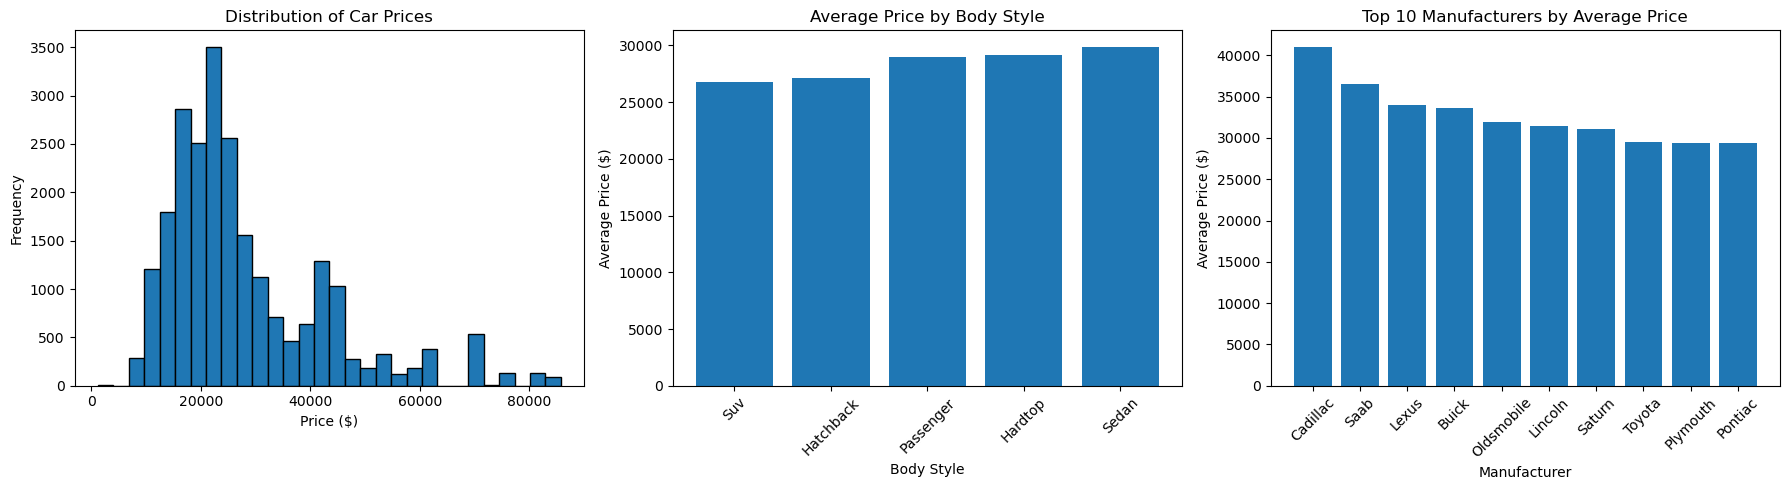

In [14]:
# Create a figure with 1 row and 3 columns for the updated visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 4.3.1 Price Distribution
axes[0].hist(car_cleaned['Price ($)'], bins=30, edgecolor='black')
axes[0].set_title("Distribution of Car Prices")
axes[0].set_xlabel("Price ($)")
axes[0].set_ylabel("Frequency")

# 4.3.2 Price vs. Body Style
price_body_style = car_cleaned.groupby('Body Style')['Price ($)'].mean().sort_values()
axes[1].bar(price_body_style.index, price_body_style.values)
axes[1].set_title("Average Price by Body Style")
axes[1].set_xlabel("Body Style")
axes[1].set_ylabel("Average Price ($)")
axes[1].tick_params(axis='x', rotation=45)

# 4.3.3 Price vs. Company
price_company = car_cleaned.groupby('Company')['Price ($)'].mean().sort_values(ascending=False).head(10)
axes[2].bar(price_company.index, price_company.values)
axes[2].set_title("Top 10 Manufacturers by Average Price")
axes[2].set_xlabel("Manufacturer")
axes[2].set_ylabel("Average Price ($)")
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">

##### The pricing analysis shows:

1. Price Distribution:
    - Most cars are priced between $15,000 and $40,000, with a few high-value outliers.

2. Price vs. Body Style:
    - Sedans tend to have the highest average price, while SUVs are more affordable.

3. Price vs. Company:
    - Luxury brands such as Cadillac leads in terms of average car prices, while mass-market brands have lower average prices.

</div>


#### 4.4 Analyze temporal insights to explore sales seasonality and monthly performance trends.

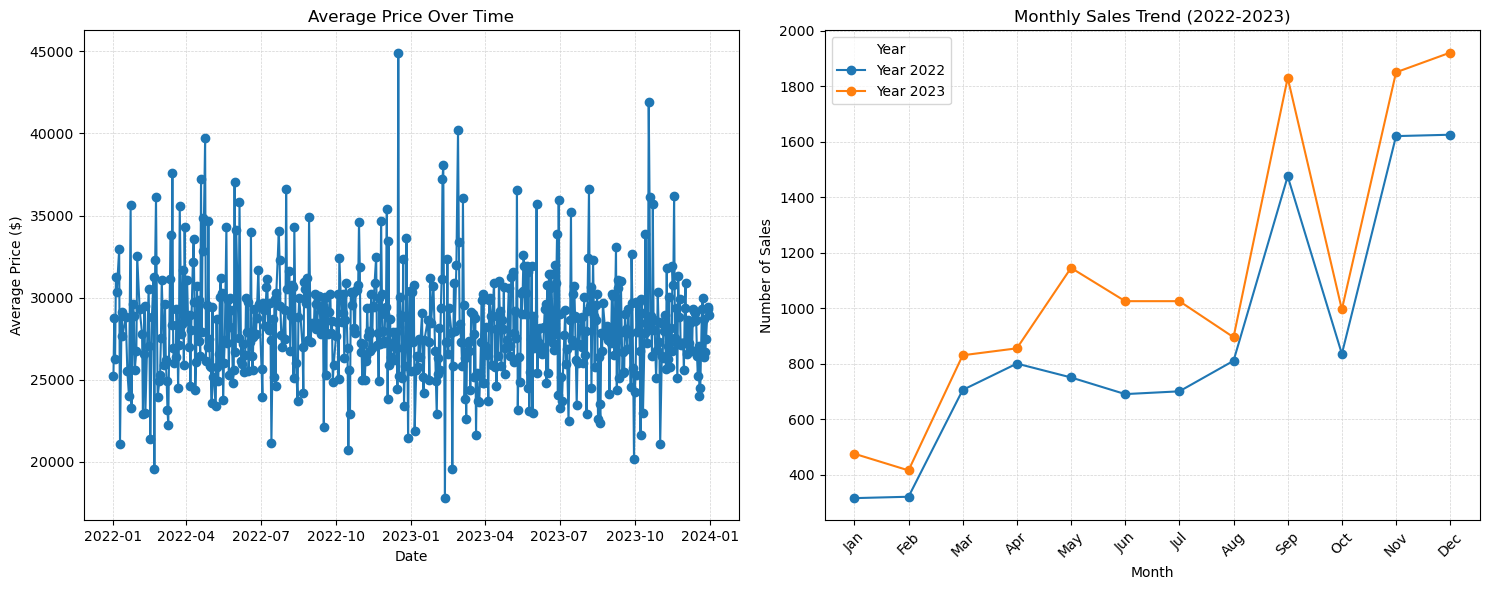

In [15]:
# Create a figure with 1 row and 2 columns for the updated visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 4.4.1 Average Price Over Time
avg_price_over_time = car_cleaned.groupby('Date')['Price ($)'].mean()
axes[0].plot(avg_price_over_time, marker='o')
axes[0].set_title("Average Price Over Time")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Average Price ($)")
axes[0].grid(color='lightgrey', linestyle='--', linewidth=0.5)

# 4.4.2 Monthly Sales Trend
monthly_sales = car_cleaned.groupby(['Year', 'Month']).size()
monthly_sales_plot = monthly_sales.unstack(level=0)  # Separate by year for clarity
for year in monthly_sales_plot.columns:
    axes[1].plot(monthly_sales_plot.index, monthly_sales_plot[year], marker='o', label=f"Year {year}")

axes[1].set_title("Monthly Sales Trend (2022-2023)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Number of Sales")
axes[1].legend(title="Year")
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)
axes[1].grid(color='lightgrey', linestyle='--', linewidth=0.5)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">

##### Temporal Insights show
1. Average Price Over Time:
    - The price data appears to fluctuate without a clear seasonal pattern, although occasional spikes are visible, likely due to sales of high-priced cars or premium models in specific months.
    - The majority of the prices fall within a range of $25,000 to $35,000, suggesting this is the typical price range for most cars sold.
2. Monthly Sales Trend (2022 vs. 2023)
    - The higher sales in 2023 compared to 2022 indicate a growth trend in the automotive market, potentially due to better marketing, new model releases, or recovering demand post-pandemic.
    - Peaks in September and December likely align with promotional periods or holiday seasons, which could be leveraged for future sales planning.

</div>


## Step 5. Modeling


### 5.1 Preprocessing Data

In [ ]:
#  Drop the 'Date' and 'Model' columns from the `car_cleaned` dataset
car_final = car_cleaned.drop(columns=['Date', 'Model'], axis=1)
car_final.head()

,Gender,Annual Income,Company,Transmission,Color,Price ($),Body Style,Dealer_Region,Year,Month
0,Male,13500,Ford,Auto,Black,26000,Suv,Middletown,2022,1
1,Male,1480000,Dodge,Auto,Black,19000,Suv,Aurora,2022,1
2,Male,1035000,Cadillac,Manual,Red,31500,Passenger,Greenville,2022,1
3,Male,13500,Toyota,Manual,Pale white,14000,Suv,Pasco,2022,1
4,Male,1465000,Acura,Auto,Red,24500,Hatchback,Janesville,2022,1


In [31]:
# Define the file path
final_data_path = "../data/final_car_sales.csv"

# Ensure the directory exists
os.makedirs(os.path.dirname(final_data_path), exist_ok=True)

# Check if car_final is a Pandas DataFrame
if isinstance(car_final, pd.DataFrame):
    print("car_final is already a Pandas DataFrame.")
else:
    print("car_final is not a Pandas DataFrame. Converting it to one...")
    car_final = pd.DataFrame(car_final)

# Save to CSV
car_final.to_csv(final_data_path, index=False, encoding='utf-8')

car_final is already a Pandas DataFrame.


In [38]:
# Load necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [43]:
# Define features and target variable
X = car_final.drop('Body Style', axis=1)
y = car_final['Body Style']

# Preprocessing pipeline: One-hot encode categorical columns, scale numerical ones
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Gender', 'Company', 'Transmission', 'Color', 'Dealer_Region', 'Year', 'Month']),
        ('num', StandardScaler(), ['Annual Income', 'Price ($)'])  # Numerical columns
    ])

# Define pipelines with different classifiers
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

### 5.2 Split data into train and test sets

In [36]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.3 Model Training, Evaluation, and Comparison

In [52]:
# Train and evaluate the pipelines
pipelines = {'Random Forest': pipeline_rf, 'SVC': pipeline_svc, 'KNN': pipeline_knn}
print("Initial Results:")
print("=" * 50)  # Separator for clarity
for name, pipe in pipelines.items():
    # Train the pipeline
    pipe.fit(X_train, y_train)
    
    # Evaluate the pipeline
    accuracy = pipe.score(X_test, y_test)
    print(f"{name} Accuracy: {accuracy:.2f}")
    
    # Generate predictions
    y_pred = pipe.predict(X_test)
    
    # Print classification report
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)  # Separator for clarity


Initial Results:
Random Forest Accuracy: 0.77
Random Forest Classification Report:
              precision    recall  f1-score   support

     Hardtop       0.60      0.59      0.59       572
   Hatchback       0.75      0.75      0.75      1200
   Passenger       0.85      0.79      0.82       804
       Sedan       0.83      0.85      0.84       902
         Suv       0.76      0.80      0.78      1304

    accuracy                           0.77      4782
   macro avg       0.76      0.75      0.76      4782
weighted avg       0.77      0.77      0.77      4782

--------------------------------------------------
SVC Accuracy: 0.54
SVC Classification Report:
              precision    recall  f1-score   support

     Hardtop       0.38      0.66      0.48       572
   Hatchback       0.59      0.47      0.53      1200
   Passenger       0.53      0.62      0.57       804
       Sedan       0.61      0.65      0.63       902
         Suv       0.62      0.44      0.51      1304

    a

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">

#### Observations:

1. Model Performance:
    - The Random Forest Classifier performs the best with an accuracy of 78% and decent precision, recall, and F1-scores across most classes.
    - SVC and KNN perform significantly worse, with accuracy scores of 58% and 47%, respectively.
    - The Hardtop class shows poor performance across all models, with low precision and recall.

2. Class Imbalance:
    - The Hardtop class has a much smaller sample size (572) compared to other classes like Suv (1304) or Hatchback (1200). This imbalance likely impacts the models' ability to classify the minority class effectively.

3. SVC and KNN Issues:
    - Both SVC and KNN may struggle due to the dataset size and high dimensionality caused by categorical encoding.

</div>

### 5.4 Model Refinements
1. Handle Class Imbalance
    - Apply techniques to address class imbalance:
        + Oversampling: Use SMOTE (Synthetic Minority Oversampling Technique) to increase the representation of minority classes.
        + Class Weights: Use class weights in the Random Forest and SVC classifiers to give more importance to minority classes.

#### 5.4.1.1 Oversampling

In [53]:
from imblearn.over_sampling import SMOTE

# Preprocess X_train before applying SMOTE
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Apply SMOTE to the preprocessed training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Update the pipelines to exclude the preprocessing step
pipeline_rf = Pipeline(steps=[
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_svc = Pipeline(steps=[
    ('classifier', SVC(random_state=42))
])

pipeline_knn = Pipeline(steps=[
    ('classifier', KNeighborsClassifier())
])

# Train and evaluate the pipelines
pipelines = {'Random Forest': pipeline_rf, 'SVC': pipeline_svc, 'KNN': pipeline_knn}
print("Results after revising Code with SMOTE:")
print("=" * 50)  # Separator for clarity
for name, pipe in pipelines.items():
    # Train the pipeline on the resampled data
    pipe.fit(X_train_resampled, y_train_resampled)
    
    # Preprocess X_test before making predictions
    X_test_preprocessed = preprocessor.transform(X_test)
    
    # Evaluate the pipeline
    accuracy = pipe.score(X_test_preprocessed, y_test)
    print(f"{name} Accuracy: {accuracy:.2f}")
    
    # Generate predictions
    y_pred = pipe.predict(X_test_preprocessed)
    
    # Print classification report
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)  # Separator for clarity


Results after revising Code with SMOTE:
Random Forest Accuracy: 0.78
Random Forest Classification Report:
              precision    recall  f1-score   support

     Hardtop       0.58      0.64      0.61       572
   Hatchback       0.78      0.75      0.77      1200
   Passenger       0.84      0.82      0.83       804
       Sedan       0.84      0.86      0.85       902
         Suv       0.79      0.78      0.79      1304

    accuracy                           0.78      4782
   macro avg       0.77      0.77      0.77      4782
weighted avg       0.78      0.78      0.78      4782

--------------------------------------------------
SVC Accuracy: 0.57
SVC Classification Report:
              precision    recall  f1-score   support

     Hardtop       0.41      0.59      0.49       572
   Hatchback       0.59      0.52      0.55      1200
   Passenger       0.56      0.62      0.59       804
       Sedan       0.65      0.67      0.66       902
         Suv       0.62      0.52    

#### 5.4.1.2 Class Weights

In [54]:
# Define pipelines with class weights for handling imbalance
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

pipeline_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42, class_weight='balanced'))
])

# Add KNN for comparison (KNN does not support class weights natively)
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Train and evaluate the pipelines
pipelines = {'Random Forest': pipeline_rf, 'SVC': pipeline_svc, 'KNN': pipeline_knn}
print("Results after revising Code with Class Weights:")
print("=" * 50)  # Separator for clarity
for name, pipe in pipelines.items():
    # Train the pipeline on the training data
    pipe.fit(X_train, y_train)
    
    # Evaluate the pipeline
    accuracy = pipe.score(X_test, y_test)
    print(f"{name} Accuracy: {accuracy:.2f}")
    
    # Generate predictions
    y_pred = pipe.predict(X_test)
    
    # Print classification report
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)  # Separator for clarity


Results after revising Code with Class Weights:
Random Forest Accuracy: 0.77
Random Forest Classification Report:
              precision    recall  f1-score   support

     Hardtop       0.60      0.59      0.59       572
   Hatchback       0.75      0.75      0.75      1200
   Passenger       0.85      0.79      0.82       804
       Sedan       0.83      0.85      0.84       902
         Suv       0.76      0.80      0.78      1304

    accuracy                           0.77      4782
   macro avg       0.76      0.75      0.76      4782
weighted avg       0.77      0.77      0.77      4782

--------------------------------------------------
SVC Accuracy: 0.54
SVC Classification Report:
              precision    recall  f1-score   support

     Hardtop       0.38      0.66      0.48       572
   Hatchback       0.59      0.47      0.53      1200
   Passenger       0.53      0.62      0.57       804
       Sedan       0.61      0.65      0.63       902
         Suv       0.62      

### Task 1: Car Category Prediction (Classification)
Use Random Forest Classifier to predict car categories based on demographic features and historical purchase data.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Prepare features and target
features = ['Annual Income', 'Gender', 'Dealer_Region']
target = 'Body Style'

# Encode categorical variables
encoded_data = car_cleaned.copy()
for col in features:
    if encoded_data[col].dtype == 'object':
        le = LabelEncoder()
        encoded_data[col] = le.fit_transform(encoded_data[col])
target_encoder = LabelEncoder()
encoded_data[target] = target_encoder.fit_transform(encoded_data[target])

# Split data and train model
X = encoded_data[features]
y = encoded_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=target_encoder.classes_)


### Task 2: Price Prediction (Regression)
Use Random Forest Regressor to predict car prices based on demographic and car-related features.

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare features and target
features = ['Annual Income', 'Gender', 'Dealer_Region', 'Company', 'Model', 'Transmission', 'Color']
target = 'Price ($)'

# Encode categorical variables
for col in features:
    if encoded_data[col].dtype == 'object':
        le = LabelEncoder()
        encoded_data[col] = le.fit_transform(encoded_data[col])

X = encoded_data[features]
y = encoded_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


c:\Users\sijia\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Print the Evaluation Results

In [23]:
# Print evaluation results for the Modeling step

# Classification Results
print("=== Classification Evaluation (Car Category Prediction) ===")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

# Regression Results
print("\n=== Regression Evaluation (Price Prediction) ===")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")


=== Classification Evaluation (Car Category Prediction) ===
Accuracy: 0.23
Classification Report:
              precision    recall  f1-score   support

     Hardtop       0.15      0.10      0.12       572
   Hatchback       0.25      0.29      0.27      1200
   Passenger       0.17      0.11      0.14       804
       Sedan       0.20      0.17      0.18       902
         Suv       0.28      0.36      0.31      1304

    accuracy                           0.23      4782
   macro avg       0.21      0.21      0.20      4782
weighted avg       0.22      0.23      0.22      4782


=== Regression Evaluation (Price Prediction) ===
RMSE: 9004.99
MAE: 4618.24
R2 Score: 0.62
